<a href="https://colab.research.google.com/github/dolidovich1/Mikhail-Dolidovich/blob/main/PrIS_part_3_30_03_2021_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мини проект для работы с гит и гитхаб.

<h2> Exploratory data analysis (EDA) </h2>

<h2> Разветочный (исследовательский) анализ данных </h2>

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png">

# import packages

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro

from sklearn.ensemble import ExtraTreesClassifier

# import data

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence ... if it is correctly identified!

Attributes are:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium 
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass

Type of glass:
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names = ["Id","RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace(
                      {
                       1:"building_float", 
                       2:"building_non_float", 
                       3:"vehicle_float",
                       4:"vehicle_non_float", 
                       5:"containers", 
                       6:"tableware",
                       7:"headlamps"
                      }, inplace=True)
data.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_float


In [ ]:
for col in data.columns:
    fr = np.random.randint(5,10)/100
    data.loc[data.sample(frac=fr).index, col] = np.nan

# Data Vizualization

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      197 non-null    float64
 3   Al      199 non-null    float64
 4   Si      199 non-null    float64
 5   K       195 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      199 non-null    float64
 8   Fe      195 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,197.000000,197.000000,197.000000,199.000000,199.000000,195.000000,197.000000,199.000000,195.000000
mean,1.518323,13.393553,2.715381,1.441859,72.639196,0.506615,8.978376,0.182513,0.059128
std,0.002997,0.826488,1.424999,0.496587,0.794205,0.679087,1.468844,0.513042,0.099653
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516510,12.900000,2.200000,1.190000,72.255000,0.120000,8.270000,0.000000,0.000000
50%,1.517640,13.270000,3.480000,1.360000,72.790000,0.560000,8.610000,0.000000,0.000000
75%,1.519150,13.800000,3.600000,1.625000,73.080000,0.610000,9.180000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
display( data["Class"].describe() )
print("===========================")
display( data['Class'].value_counts() )

count                    203
unique                     6
top       building_non_float
freq                      72
Name: Class, dtype: object

building_non_float    72
building_float        65
headlamps             28
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [ ]:
for col in data.columns:

  missing_values_counts = data[col].isna().sum()
  percentage = 100*data[col].isna().sum()/len(data[col])
  
  print("Column",col,"contains",missing_values_counts,
        "NULL values (",
        percentage,"% ).")

Column RI contains 17 NULL values ( 7.94392523364486 % ).
Column Na contains 17 NULL values ( 7.94392523364486 % ).
Column Mg contains 17 NULL values ( 7.94392523364486 % ).
Column Al contains 15 NULL values ( 7.009345794392523 % ).
Column Si contains 15 NULL values ( 7.009345794392523 % ).
Column K contains 19 NULL values ( 8.878504672897197 % ).
Column Ca contains 17 NULL values ( 7.94392523364486 % ).
Column Ba contains 15 NULL values ( 7.009345794392523 % ).
Column Fe contains 19 NULL values ( 8.878504672897197 % ).
Column Class contains 11 NULL values ( 5.140186915887851 % ).


# Histograms

In [ ]:
col = 'Al'

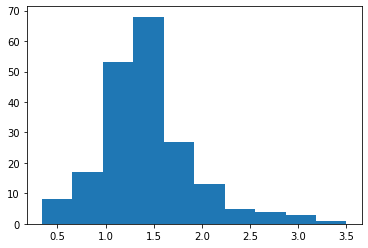

In [ ]:
plt.hist(data[col])
plt.show()

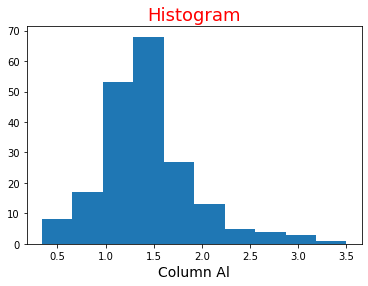

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

# create everything you need
ax.hist(data[col])
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

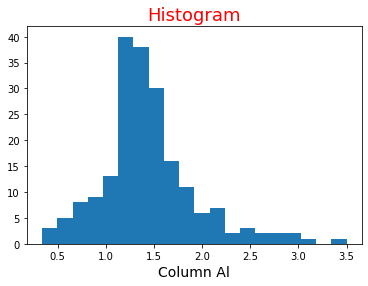

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

# create everything you need
ax.hist(data[col], bins=20)
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

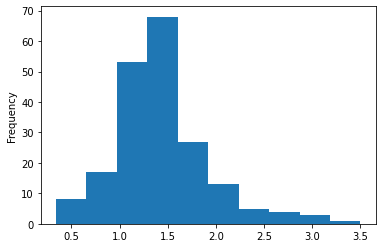

In [ ]:
data[col].plot(kind='hist')
plt.show()

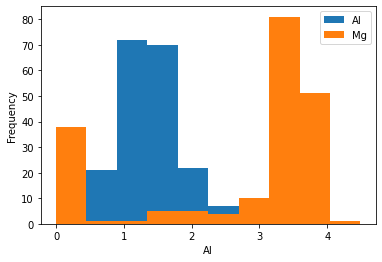

In [ ]:
ax = data[['Al','Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

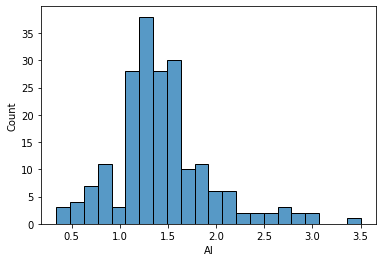

In [ ]:
sns.histplot(data=data, x=col)
plt.show()

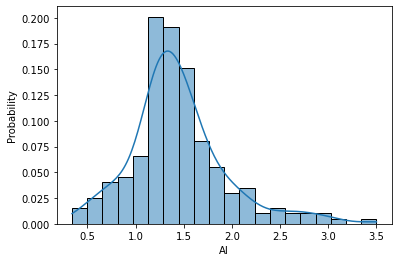

In [ ]:
sns.histplot(data=data, x=col,
             bins=20, 
             kde=True, 
             stat='probability')
plt.show()

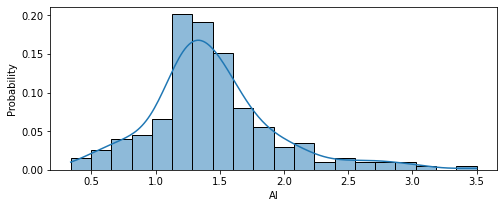

In [ ]:
plt.figure(figsize=(8, 3))
ax = sns.histplot(data=data, x="Al", bins=20, 
             kde=True, stat='probability')
plt.show()

# bar plot

In [ ]:
col = 'Class'

In [ ]:
df1 = data[col].value_counts()
df1

building_non_float    72
building_float        65
headlamps             28
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [ ]:
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [ ]:
df1.values

array([72, 65, 28, 17, 12,  9])

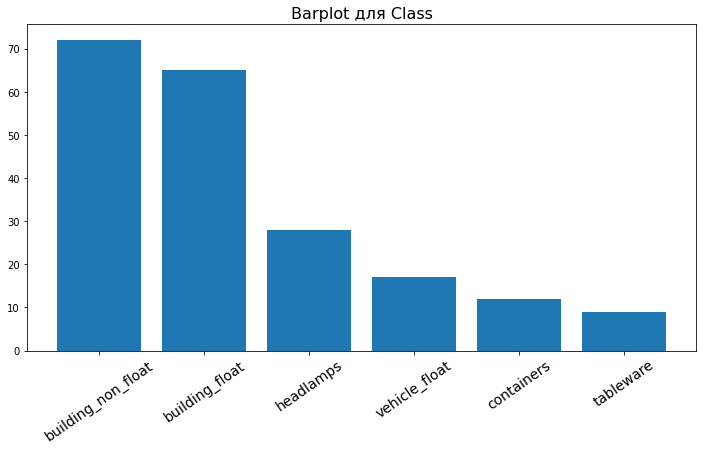

In [ ]:
col='Class'

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values, 
       data[col].value_counts().values)

ax.set_xlabel(None, fontsize=16)
ax.set_title('Barplot для '+str(col), fontsize=16)
ax.tick_params(axis='x', which='major', 
               labelsize=14, rotation=35)

plt.show()

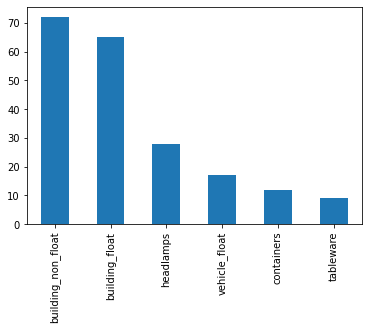

In [ ]:
data[col].value_counts().plot(kind='bar')
plt.show()

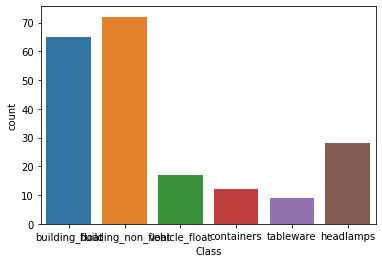

In [ ]:
sns.countplot(data=data, x='Class')
plt.show()

**Задание**

Сделать виджет для выбора переменной (столбца в датафрейме). Для выбранного столбца показать график: гистограмму для числовых данных, barplot - для категорий.

# boxplot

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png">

In [ ]:
col='Al'
data[col][~np.isnan(data[col])]

0      1.10
1      1.36
3      1.29
4      1.24
5      1.62
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 199, dtype: float64

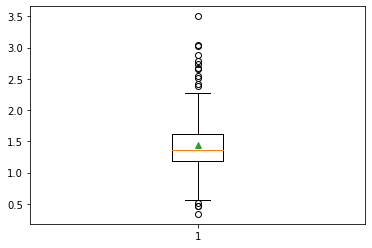

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)

plt.show()

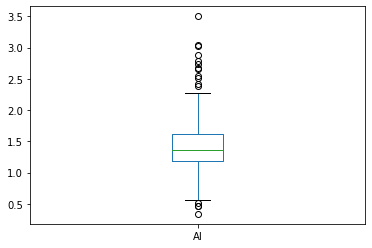

In [ ]:
data[col].plot(kind='box')
plt.show()

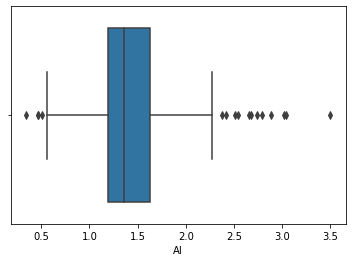

In [ ]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


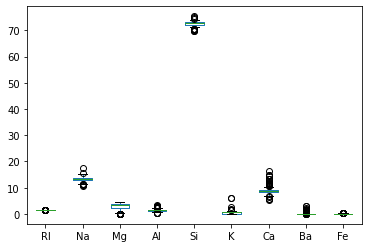

In [ ]:
data.plot(kind='box')
plt.show()

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [ ]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [ ]:
data.columns.values != 'Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
data.columns.values[data.columns.values != 'Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


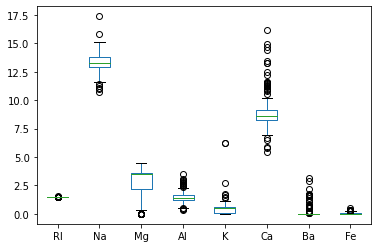

In [ ]:
data[data.columns.values[data.columns.values != 'Si']].plot(kind='box')
plt.show()

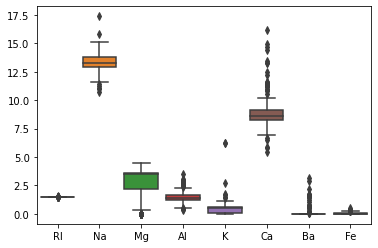

In [ ]:
sns.boxplot(data=data[data.columns.values[data.columns.values != 'Si']])
plt.show()

# Scaler

```
obj = Model
obj.fit
obj.predict / obj.transform
(obj.fit_transform)
```



In [ ]:
scaler1 = prepro.MinMaxScaler()
dataScaled1 = scaler1.fit_transform(
    data[data.columns.values[data.columns.values != 'Class']])
dataScaled1 = pd.DataFrame(dataScaled1,
                   columns=data.columns.values[data.columns.values != 'Class'])


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


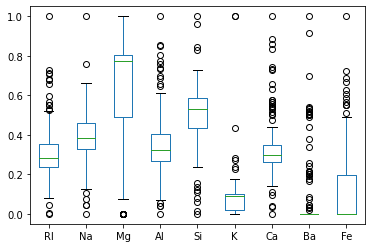

In [ ]:
dataScaled1.plot(kind='box')
plt.show()

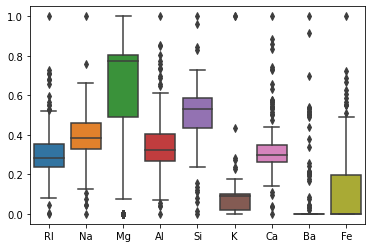

In [ ]:
sns.boxplot(data=dataScaled1)
plt.show()

In [ ]:
scaler2 = prepro.StandardScaler()
dataScaled2 = scaler2.fit_transform(
    data[data.columns.values[data.columns.values != 'Class']])
dataScaled2 = pd.DataFrame(dataScaled2,
                   columns=data.columns.values[data.columns.values != 'Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


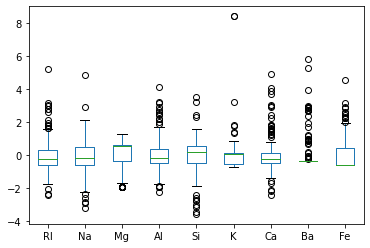

In [ ]:
dataScaled2.plot(kind='box')
plt.show()

# Pair Plot

In [ ]:
col1 = 'Mg'
col2 = 'Fe'

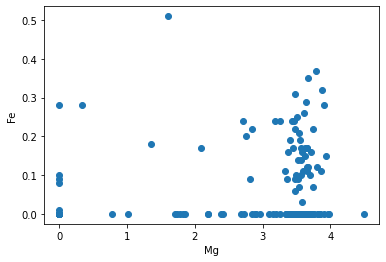

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

In [ ]:
df1 = data['Class'].value_counts()
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

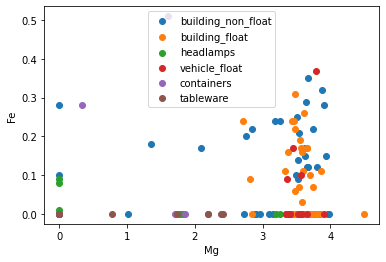

In [ ]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][ data['Class']==glassType ],
             data[col2][ data['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


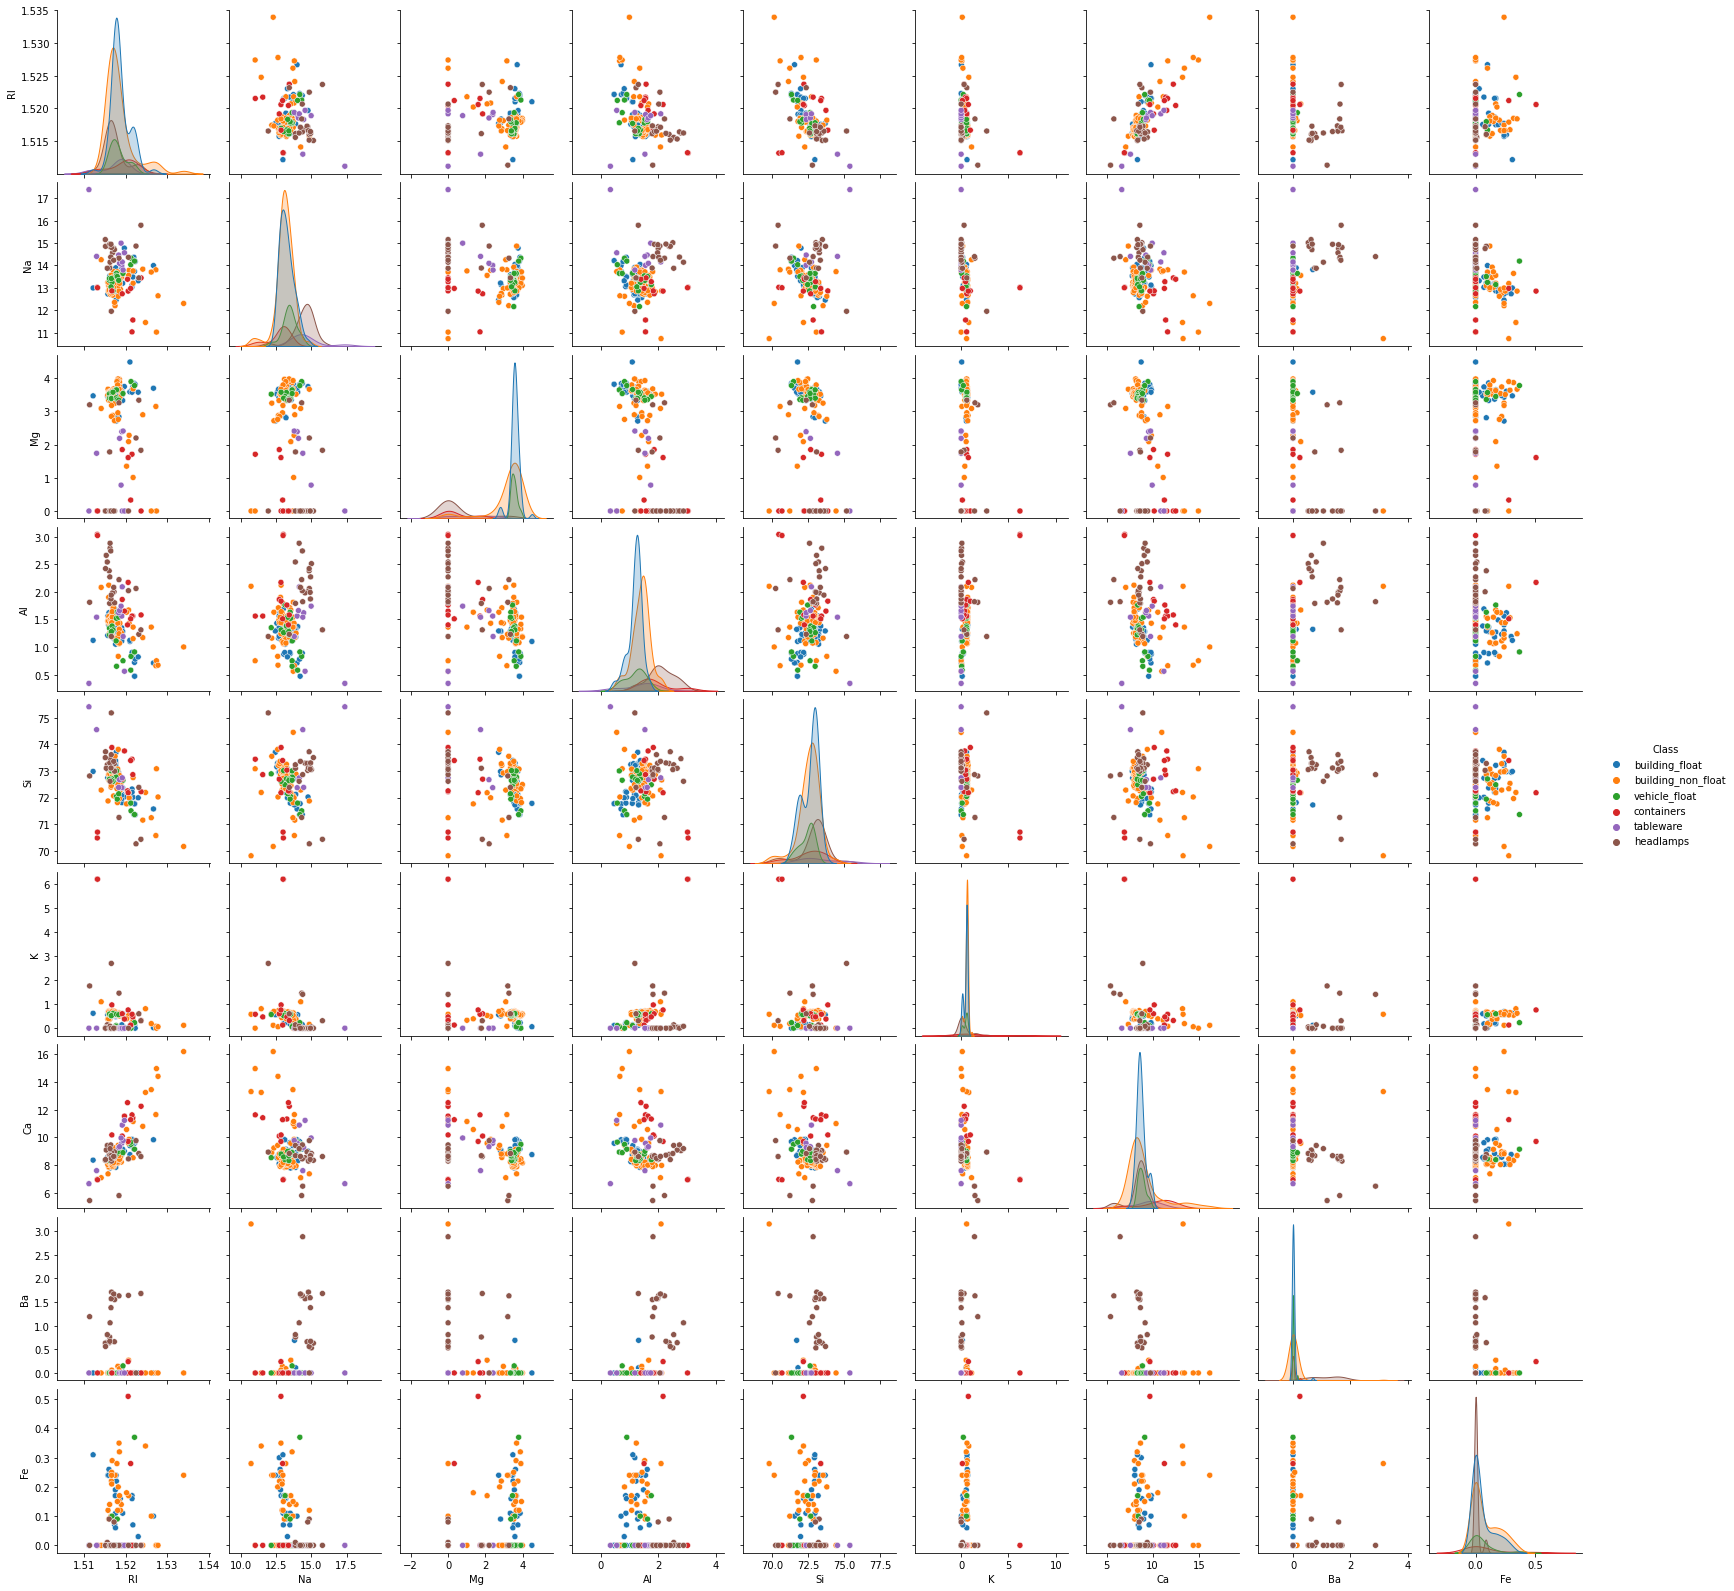

In [ ]:
sns.pairplot(data=data, hue='Class')
plt.show()

**Задание**

С помощью виджетов, сделать отрисовку всех перменных на выбор:
1) boxplot
2) пары

# NaN

In [ ]:
data.mean()

RI     1.518323
Na    13.393553
Mg     2.715381
Al     1.441859
Si    72.639196
K      0.506615
Ca     8.978376
Ba     0.182513
Fe     0.059128
dtype: float64

In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean['Class'].value_counts().index[0]

'building_non_float'

In [ ]:
data_fillna_mean['Class'].mode()

0    building_non_float
dtype: object

In [ ]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


Задание: сделать заполнение средним/модой по категориям

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values
                          [data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_*100)

[4.32353402e+01 2.90653535e+01 1.10056196e+01 1.05456755e+01
 3.56794429e+00 1.81452376e+00 6.26983668e-01 1.38529936e-01
 2.95097875e-05]


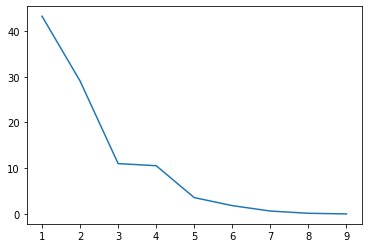

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.353482,1.285686,0.810377,-0.235341,0.257857,-0.030607,-0.150701,-0.075221,-0.000994
1,-1.452206,-0.265758,0.203889,-0.374377,-0.175015,-0.067161,0.043929,-0.043698,-0.000601
2,-1.440360,-0.257084,-0.212192,-0.345165,0.013305,-0.124426,-0.025944,0.008071,0.000166
3,-1.233407,0.288462,-0.083079,0.017394,0.010772,0.023174,-0.082494,-0.065418,-0.000015
4,-1.296634,0.059262,-0.427145,-0.226498,-0.060503,0.076676,0.029003,-0.059879,-0.000482


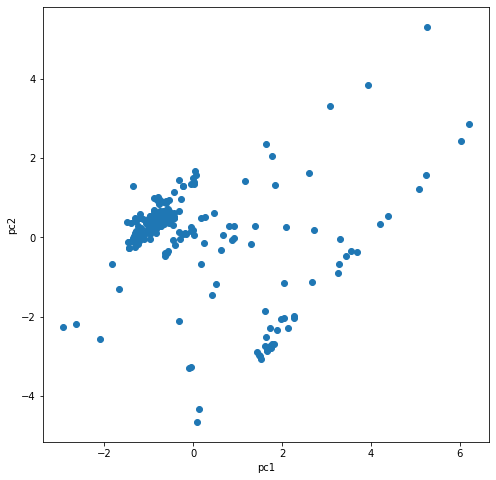

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaData['pc1'], pcaData['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

In [ ]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

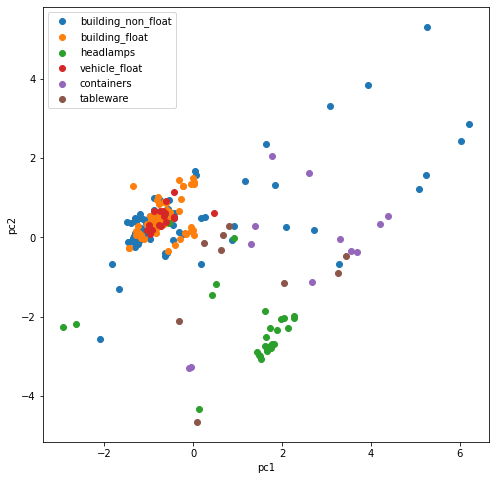

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

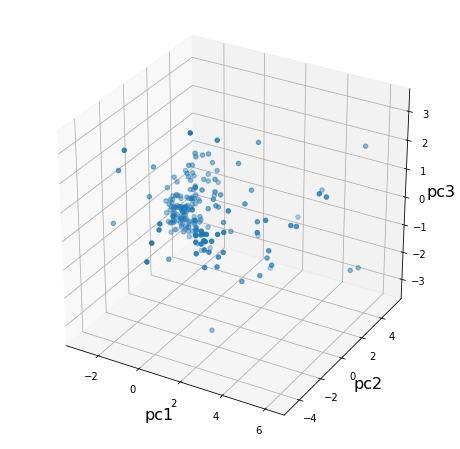

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], pcaData['pc3'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)

plt.show()

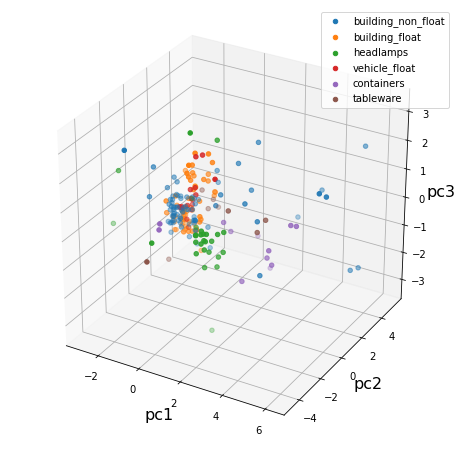

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

# Корреляции

In [ ]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.128588,0.007979,-0.420505,-0.478882,-0.290786,0.763167,-0.121217,0.081748
Na,-0.128588,1.000000,-0.270748,0.096990,-0.072181,-0.247803,-0.294159,0.275628,-0.261388
Mg,0.007979,-0.270748,1.000000,-0.472666,-0.200518,-0.018043,-0.321002,-0.509184,0.132348
Al,-0.420505,0.096990,-0.472666,1.000000,-0.029826,0.324401,-0.229580,0.446967,-0.067200
Si,-0.478882,-0.072181,-0.200518,-0.029826,1.000000,-0.193624,-0.191602,-0.112532,-0.079145
K,-0.290786,-0.247803,-0.018043,0.324401,-0.193624,1.000000,-0.307219,-0.014138,0.034808
Ca,0.763167,-0.294159,-0.321002,-0.229580,-0.191602,-0.307219,1.000000,-0.125810,0.117180
Ba,-0.121217,0.275628,-0.509184,0.446967,-0.112532,-0.014138,-0.125810,1.000000,-0.068031
Fe,0.081748,-0.261388,0.132348,-0.067200,-0.079145,0.034808,0.117180,-0.068031,1.000000


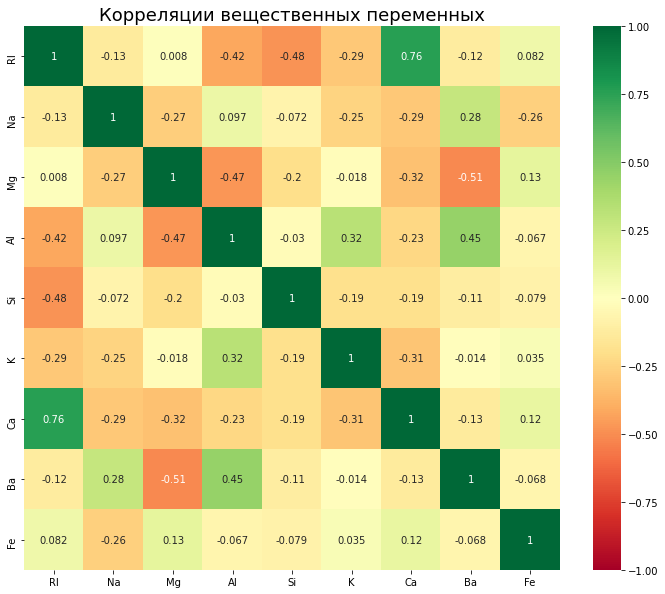

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

сильные корреляции (-1, -0.75) или (0.75, 1)

средние (-0.75, -0.45) или (0.45, 0.75)

слабые (-0.45, -0.25) или (0.25, 0.45)

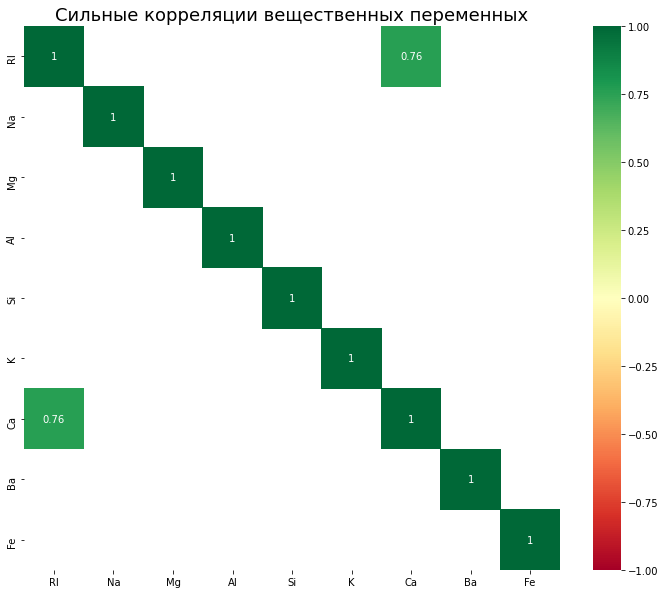

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Сильные корреляции вещественных переменных', fontsize=18)

plt.show()

# feature importance

In [ ]:
forest = ExtraTreesClassifier(n_estimators=100)

In [ ]:
#forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
forest.feature_importances_

array([0.12357401, 0.09506581, 0.17922712, 0.13172223, 0.09034555,
       0.11187246, 0.12604572, 0.08199792, 0.06014919])

In [ ]:
np.sort(forest.feature_importances_, )[::-1]

array([0.17922712, 0.13172223, 0.12604572, 0.12357401, 0.11187246,
       0.09506581, 0.09034555, 0.08199792, 0.06014919])

In [ ]:
np.argsort(forest.feature_importances_, )[::-1]

array([2, 3, 6, 0, 5, 1, 4, 7, 8])

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(forest.feature_importances_, )[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Mg (0.179227)
2. feature Al (0.131722)
3. feature Ca (0.126046)
4. feature RI (0.123574)
5. feature K (0.111872)
6. feature Na (0.095066)
7. feature Si (0.090346)
8. feature Ba (0.081998)
9. feature Fe (0.060149)


In [ ]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.03370018, 0.02681756, 0.04852028, 0.0377811 , 0.02688218,
       0.03225552, 0.04095809, 0.04558917, 0.0207583 ])

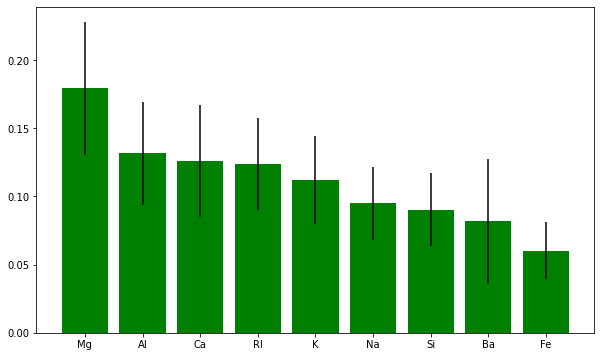

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(data_fillna_mean.columns.values[indices], importances[indices],
       color="g", yerr=std[indices], align="center")

plt.show()